In [112]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import os
import scipy

In [113]:
# groups = {"SVC": 0, "Trees": 1, "NB": 2, "Neighbors":3, "Linear":4, "DA":5, "nn":6, "Dummy":7}
# labels = ["SVC", "Trees", "NB", "Neighbors", "Linear", "DA", "Network", "Dummy"]
# dir = "experiment1/finalgraphs"

ttest_pvalues = np.zeros(shape=(3,3))
wilcoxon_pvalues = np.zeros(shape=(3,3))
mannwhitney_pvalues = np.zeros(shape=(3,3))

groups = {"LDA": 0, "QDA": 1, "Trees": 2}
labels = ["LDA", "QDA", "Trees"]
dir = "experiment2/finalgraphs"

for trained_on in groups.keys():
    baseline_dir = f"experiment2/trained{trained_on}/eval{trained_on}/aggregate_augment/data_summary_trained{trained_on}_eval{trained_on}.txt"
    with open(baseline_dir, 'r') as baseline_file:
            lines_baseline = baseline_file.readlines()
    baseline_population = eval(lines_baseline[0])
    
    for eval_on in groups.keys(): 
        if trained_on == eval_on:
            ttest_pvalues[groups[trained_on], groups[eval_on]] = 1.0
            mannwhitney_pvalues[groups[trained_on], groups[eval_on]] = 1.0
            continue
        file_dir = f"experiment2/trained{trained_on}/eval{eval_on}/aggregate_augment/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        # print(trained_on + eval_on + lines[1])
        
        population_2 = eval(lines[0])
        
        test_result = scipy.stats.ttest_ind(baseline_population,population_2, equal_var= False)
        
        pvalue = test_result.pvalue
        print(f"Ttest. {trained_on}, {eval_on}: {pvalue}")
        ttest_pvalues[groups[trained_on], groups[eval_on]] = pvalue
        
        mannwhitney_result = scipy.stats.mannwhitneyu(baseline_population, population_2)
        pvalue3 = mannwhitney_result.pvalue
        mannwhitney_pvalues[groups[trained_on], groups[eval_on]] = pvalue3
        
mask = np.eye(3, dtype=bool)

Ttest. LDA, QDA: 9.072325252152592e-165
Ttest. LDA, Trees: 0.13654148639250233
Ttest. QDA, LDA: 6.136071822758064e-56
Ttest. QDA, Trees: 4.585701198407709e-98
Ttest. Trees, LDA: 3.5305905413783037e-35
Ttest. Trees, QDA: 2.0914385012706354e-289


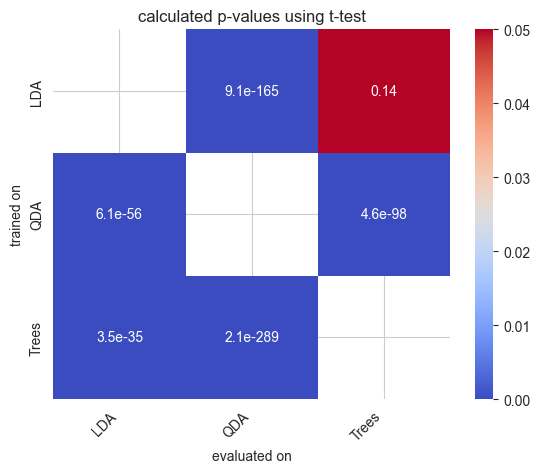

In [114]:
plot = sns.heatmap(ttest_pvalues, 
            mask=mask,
            cmap="coolwarm",
            annot=True,
            vmax=0.05,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "calculated p-values using t-test"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()

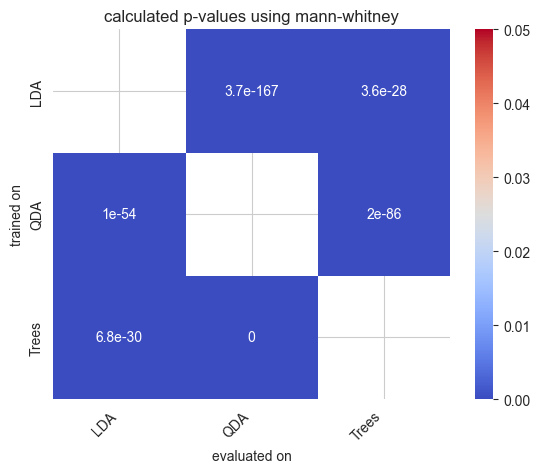

In [115]:
plot = sns.heatmap(mannwhitney_pvalues, 
            mask= mask,
            cmap="coolwarm",
            annot=True,
            vmax=0.05,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "calculated p-values using mann-whitney"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"{dir}/{name}", bbox_inches="tight")
plt.show()